In [ ]:
Let's check that the sky brighntess SEDs, sky brightness mags, and pre-computed mags are all consistent

In [1]:
%matplotlib inline
import lsst.sims.skybrightness as sb
import lsst.sims.skybrightness_pre as sbp
import healpy as hp
import numpy as np
from lsst.sims.photUtils import Sed, Bandpass
import os
import matplotlib.pylab as plt

In [2]:
nside = 32
hpmap = np.zeros(hp.nside2npix(nside))
lat, ra = hp.pix2ang(nside, np.arange(hpmap.size))
dec = np.pi/2-lat
mjd = 61044.077855

In [3]:
# Load up the filter throughput curves. Note, may not include QE and lenses like it maybe should
dataDir = os.getenv('SIMS_SKYBRIGHTNESS_DATA_DIR')
throughPath = os.getenv('LSST_THROUGHPUTS_BASELINE')
keys = ['u', 'g', 'r', 'i', 'z', 'y']
filters = {}
for filtername in keys:
    bp = np.loadtxt(os.path.join(throughPath, 'filter_'+filtername+'.dat'),
                    dtype=zip(['wave', 'trans'], [float]*2))
    tempB = Bandpass()
    tempB.setBandpass(bp['wave'], bp['trans'])
    filters[filtername] = tempB


In [4]:
sm_spec = sb.SkyModel()

In [5]:
sm_spec.setRaDecMjd(ra,dec,mjd, degrees=False)
wave, all_sky_spec = sm_spec.returnWaveSpec()

/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+5/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:1045: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if phi == None:


In [6]:
manual_mags = {}
for key in keys:
    manual_mags[key] = np.zeros(hp.nside2npix(nside), dtype=float)

In [7]:

for i,spec in enumerate(all_sky_spec):
    temp_sed = Sed()
    temp_sed.setSED(wave, flambda=spec)
    for filtername in keys:
        temp_mag = temp_sed.calcMag(filters[filtername])
        manual_mags[filtername][i] += temp_mag
        


In [8]:
# use the return mags feature and then pre-computed sky brightness.
return_mags = sm_spec.returnMags(filters)

In [9]:
print manual_mags
print return_mags

{'g': array([         nan,          nan,          nan, ...,  18.24841784,
        18.22598218,  18.21621516]), 'i': array([         nan,          nan,          nan, ...,  18.44757259,
        18.41872421,  18.42009408]), 'r': array([         nan,          nan,          nan, ...,  18.33500818,
        18.31024492,  18.30379384]), 'u': array([         nan,          nan,          nan, ...,  19.16592046,
        19.15030037,  19.14014513]), 'y': array([         nan,          nan,          nan, ...,  17.4169713 ,
        17.37374293,  17.39439919]), 'z': array([         nan,          nan,          nan, ...,  18.20355028,
        18.16735128,  18.17902989])}
{'g': array([         nan,          nan,          nan, ...,  18.24841784,
        18.22598218,  18.21621516]), 'i': array([         nan,          nan,          nan, ...,  18.44757259,
        18.41872421,  18.42009408]), 'r': array([         nan,          nan,          nan, ...,  18.33500818,
        18.31024492,  18.30379384]), 'u': arr

In [10]:
sm_mags = sb.SkyModel(mags=True)
sm_mags.setRaDecMjd(ra,dec,mjd, degrees=False)
interp_mags = sm_mags.returnMags()

In [11]:
interp_mags

{'g': array([         nan,          nan,          nan, ...,  18.24501924,
         18.22255069,  18.21274915]),
 'i': array([         nan,          nan,          nan, ...,  18.44437513,
         18.41554817,  18.41691229]),
 'r': array([         nan,          nan,          nan, ...,  18.33277744,
         18.30800748,  18.30154618]),
 'u': array([         nan,          nan,          nan, ...,  19.16074212,
         19.14510205,  19.1349249 ]),
 'y': array([         nan,          nan,          nan, ...,  17.41568426,
         17.37246346,  17.393117  ]),
 'z': array([         nan,          nan,          nan, ...,  18.20198592,
         18.1658135 ,  18.17748157])}

In [12]:
sm = sbp.SkyModelPre(preload=False)

In [13]:
pre_mags = sm.returnMags(mjd)

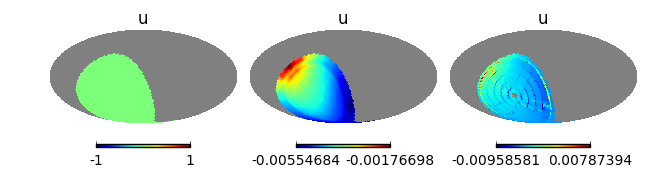

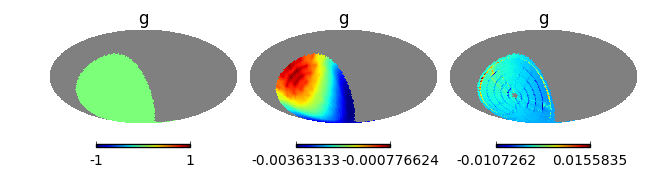

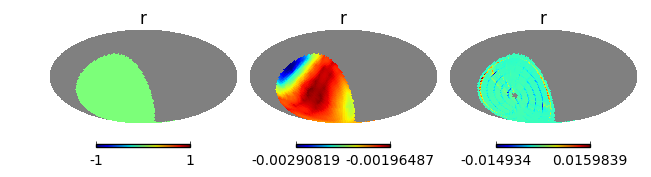

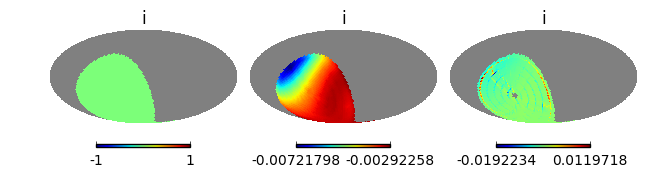

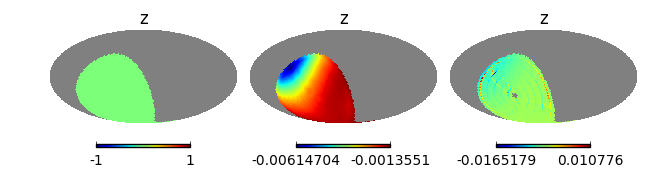

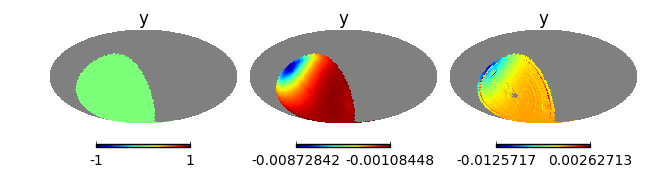

In [27]:
filtername = 'y'
for filtername in keys:
    plt.figure()
    hp.mollview(return_mags[filtername] - manual_mags[filtername], title=filtername, sub=(1,3,1))
    hp.mollview(interp_mags[filtername] - manual_mags[filtername], title=filtername, sub=(1,3,2))
    hp.mollview(pre_mags[filtername] - manual_mags[filtername], title=filtername, sub=(1,3,3))
    

#for i,filtername in enumerate(keys):
#    hp.mollview(pre_mags[filtername], sub=(1,6,i+1), title=filtername)

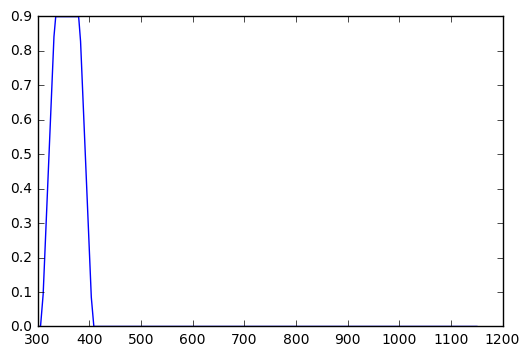

In [37]:
# Now lets do one last one to compare how the magnitudes change if we include lenses and QE to the filter curves
plt.plot(filters['u'].wavelen, filters['u'].sb)

In [34]:
dir(filters['r'])

['__doc__',
 '__init__',
 '__module__',
 '_physParams',
 'bandpassname',
 'calcEffWavelen',
 'calcZP_t',
 'checkUseSelf',
 'getBandpass',
 'getWavelenLimits',
 'imsimBandpass',
 'multiplyThroughputs',
 'needResample',
 'phi',
 'readThroughput',
 'readThroughputList',
 'resampleBandpass',
 'sb',
 'sbTophi',
 'setBandpass',
 'setWavelenLimits',
 'wavelen',
 'wavelen_max',
 'wavelen_min',
 'wavelen_step',
 'writeThroughput']

In [38]:
total_filters = {}
for filtername in keys:
    bp = np.loadtxt(os.path.join(throughPath, 'total_'+filtername+'.dat'),
                    dtype=zip(['wave', 'trans'], [float]*2))
    tempB = Bandpass()
    tempB.setBandpass(bp['wave'], bp['trans'])
    total_filters[filtername] = tempB


In [39]:
total_filt_mags = sm_spec.returnMags(total_filters)

In [40]:
total_filt_mags['r']

array([         nan,          nan,          nan, ...,  18.3347704 ,
        18.31000944,  18.30357884])

In [41]:
return_mags['r']

array([         nan,          nan,          nan, ...,  18.33500818,
        18.31024492,  18.30379384])

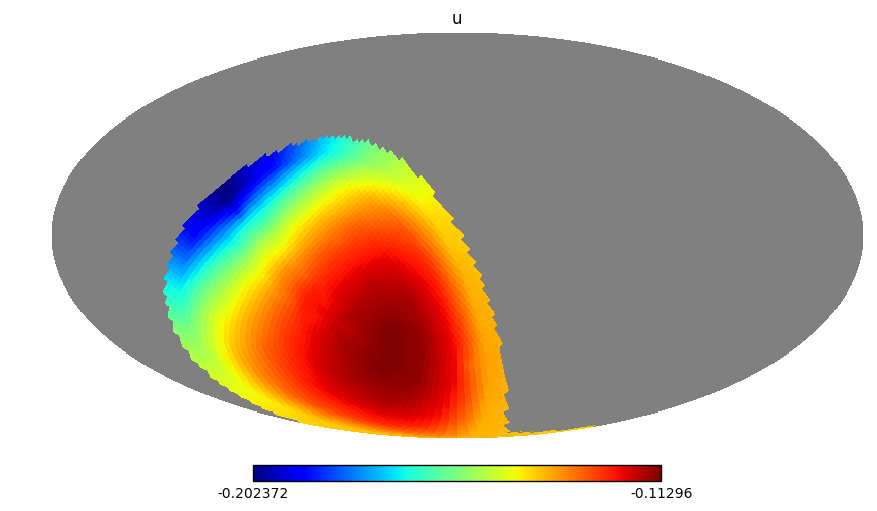

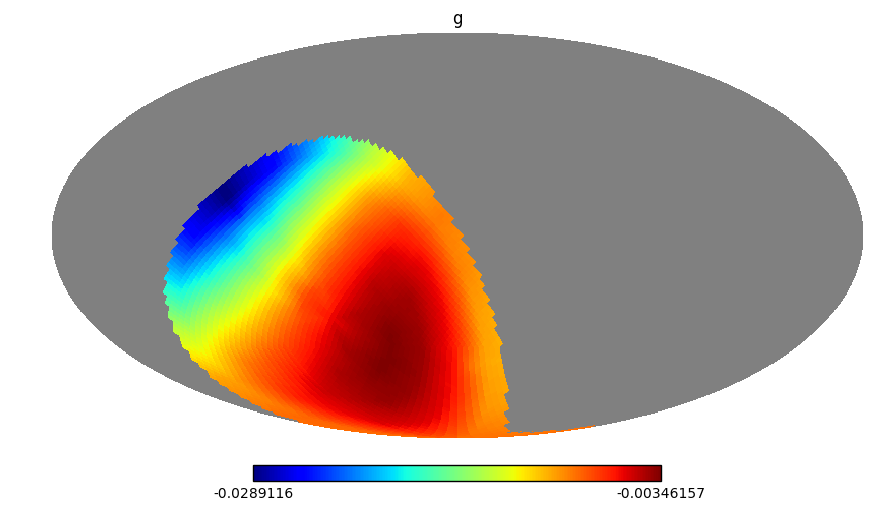

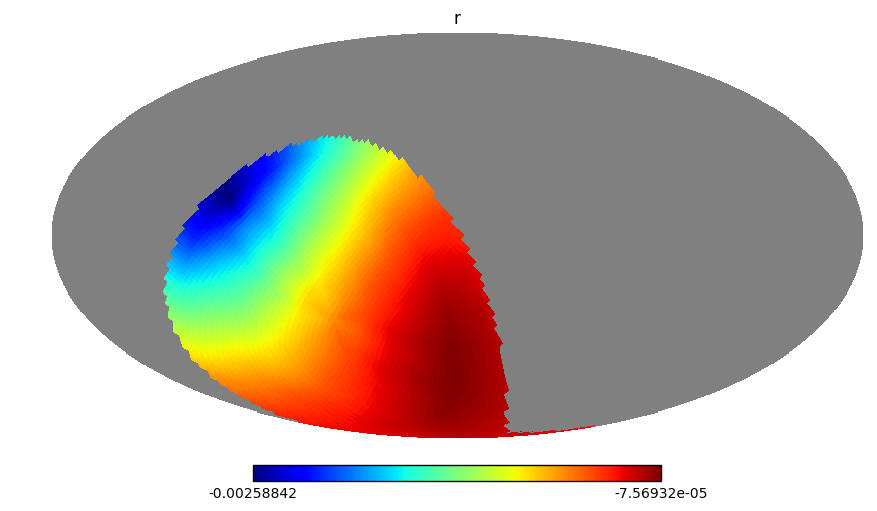

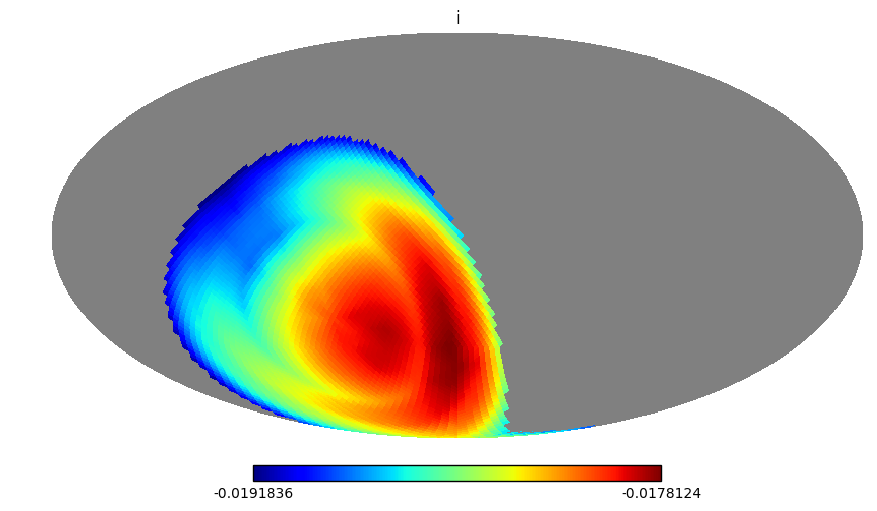

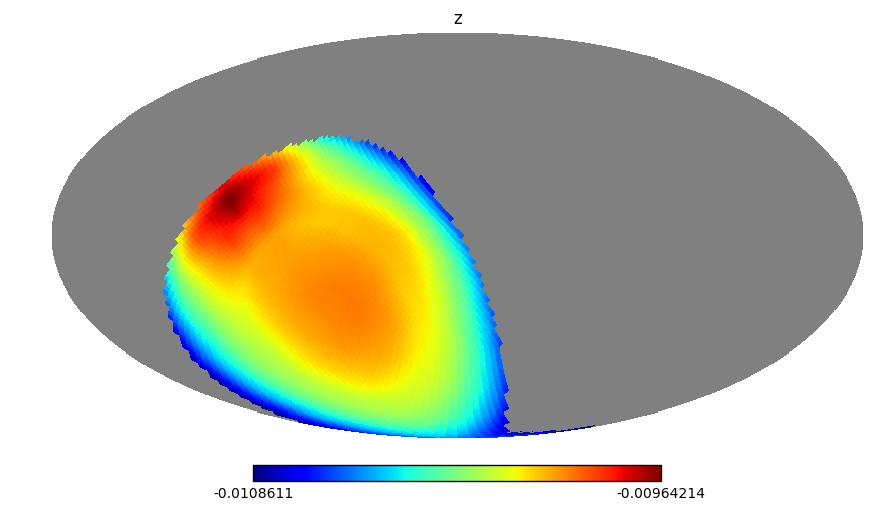

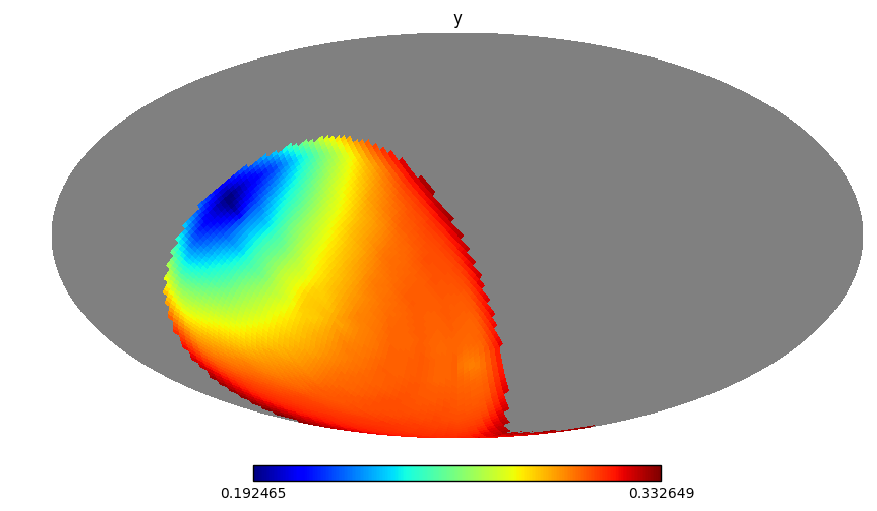

In [42]:
for filtername in keys:
    plt.figure()
    hp.mollview(total_filt_mags[filtername] - manual_mags[filtername], title=filtername)
 